# Rainfall Prediction - Weather Forecasting

# Problem Statement:
    
    Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r"C:\Users\sai\Downloads\weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


# Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# EDA

In [10]:
#checking the size of the dataser
df.shape

(8425, 23)

We can see that we have 8425 rows and 23 columns in the dataset

In [11]:
#checking the columns of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

We have these columns in the dataset. As we have to predict the rainfall for toromorrow and the amount of rainall we will see the co relation of all the features with these two targers and see if all the features are related.

In [12]:
#getting an overall overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [13]:
#checking the data types of the dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

We can see that we have both object and float datatypes

In [14]:
#checking the unique numbers of the dataset
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

By looking at these unique types we can say one of our target variable 'RainTomorrow' has 2 classes making it a classification problem while predicting tomorrows rainfall and the other target Rainfall is a continuous data making it a regression problem.

In [15]:
#checkig the null values of the dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

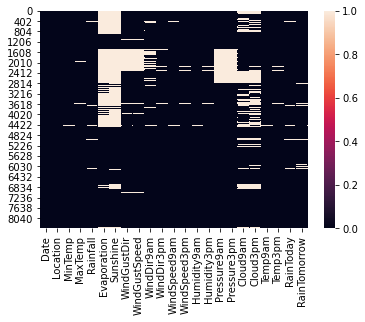

In [16]:
sns.heatmap(df.isnull())

We can clearly see from the dataset that apart from the date and location we have null values in almost all of the features and also the target values.

In [17]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('_____________________________________')

2011-02-04    5
2011-03-26    5
2011-03-03    5
2011-02-20    5
2011-03-02    5
             ..
2013-05-25    1
2013-03-28    1
2013-05-16    1
2013-03-26    1
2013-01-15    1
Name: Date, Length: 3004, dtype: int64
_____________________________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
_____________________________________
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
_____________________________________
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 331, dtype: int64
_____________________________________
0.0      5299
0.2

From the value counts we can see that the target variable rain tomorrow is imbalanced, will use SMOTE later

# Feature Engineering and Data Cleaning

1.As we have seen above that the date feature is showing as object however it is a numerical value.. Lets treat it.

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [20]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [21]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


# Treating the Null Values by Imputation

In [23]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [24]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

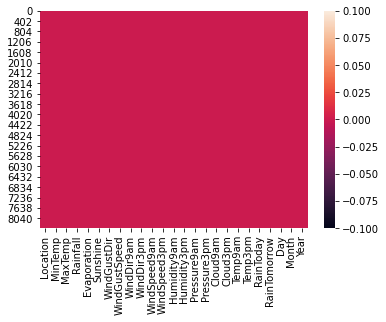

In [25]:
sns.heatmap(df.isnull())

We can clearly see that we have successfully treated all the null values and we dont have any null values in the dataset

Statistical Overview of the Dataset

In [26]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

# Visualization

Checking the categorical columns and numerical columns

In [27]:
#checking categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [28]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


Univariate Analysis of the categorical columns

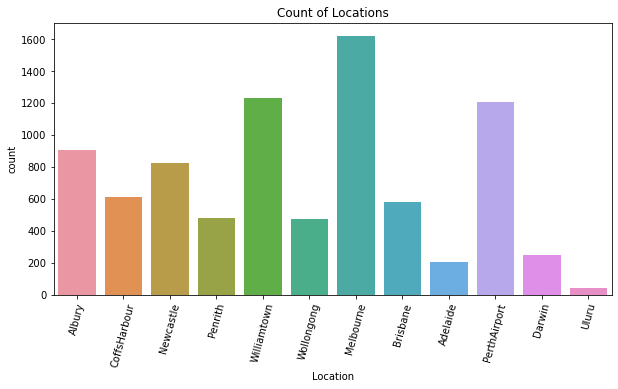

In [29]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

We have the highese rainfall data from Melbourbne and least from Uluru

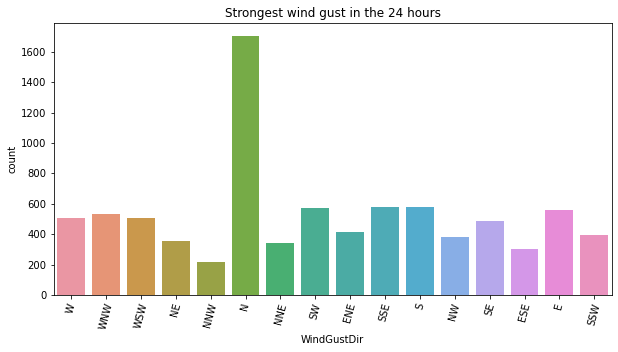

In [30]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

We can clearly see that the wind gust was strongest towards the north, followed by the SW, SSE, S,WNW.

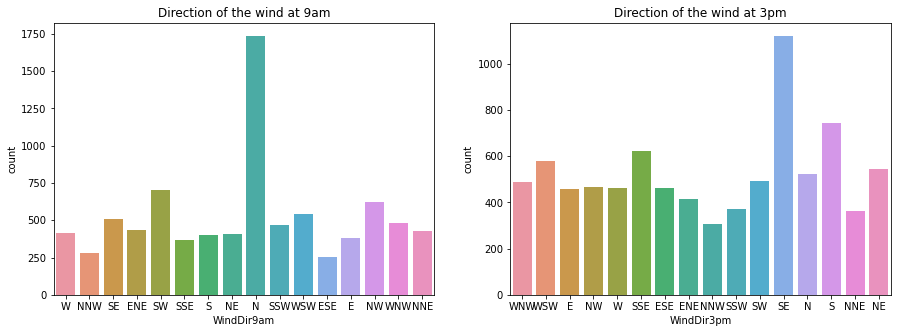

In [31]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()


In the plots we can clearly see that the wing direction was towards the N at 9am and in the SE at 3pm

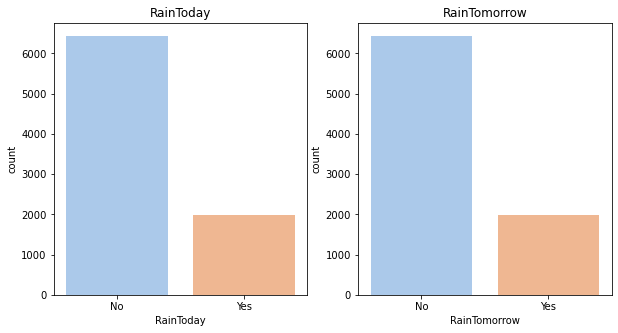

In [32]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

We can hardy see any difference in the rainfall today and tomorrow, we will see the corelation later and do the feature selection

# Visualizing the distribution of the numerical columns

In [33]:
len(num_col)

19

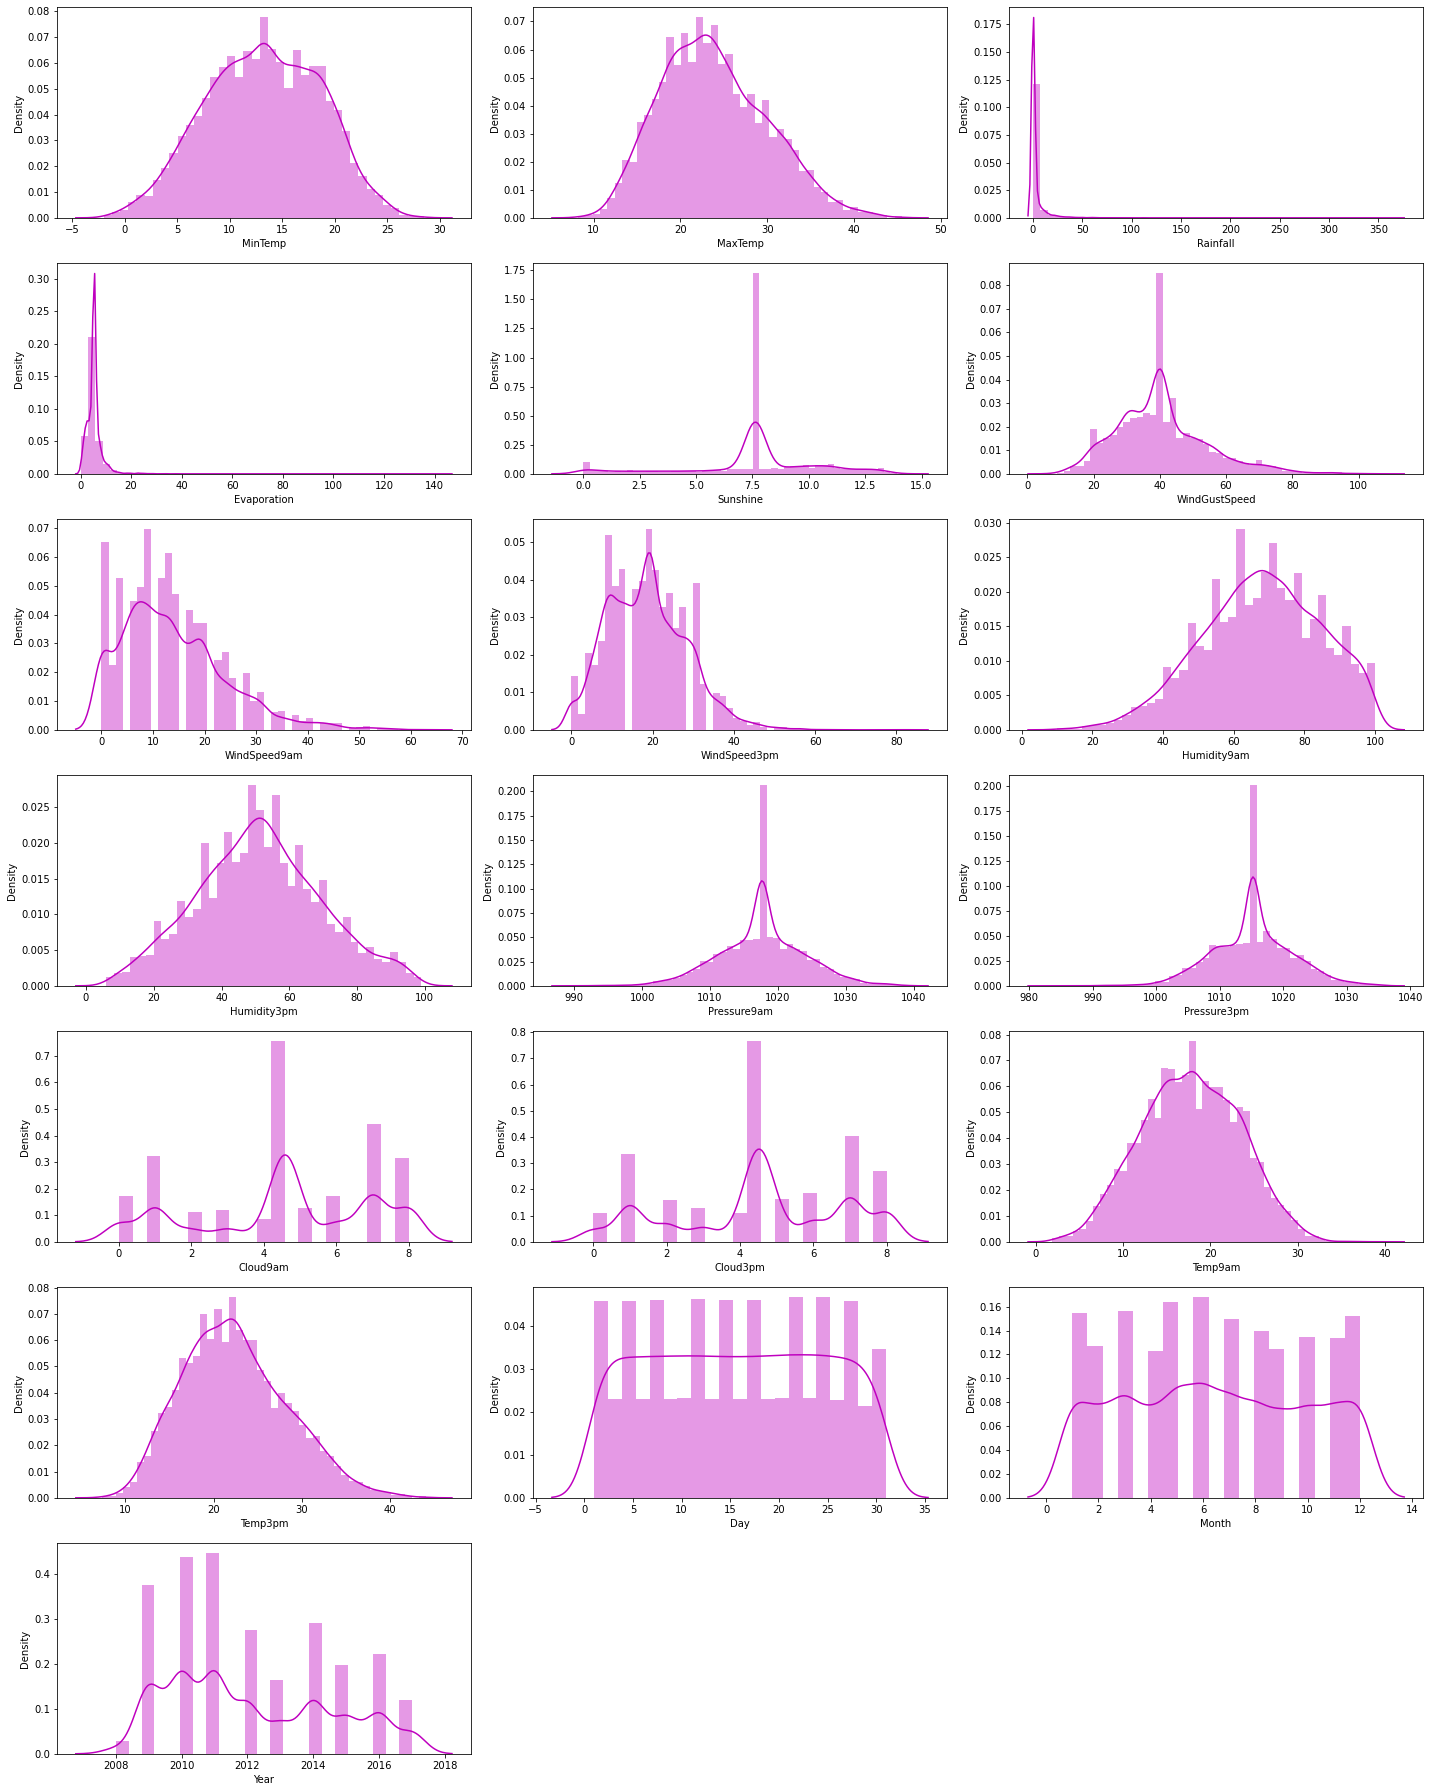

In [34]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()


From the graphs we can say that the dataset is not normally distributed.

Min Temp is normally distributed

Max Temp is slightly skewed right

Rainfall is skewed right

Evaporation is skewed right

Sunshine is not normally distributed

WindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right

Humidity9am is slightly skewed left and Humidity3pm is normally distributed.

Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not distributed normally

# Bivariate Analysis

Checking the relation between the features and the two targerts we have

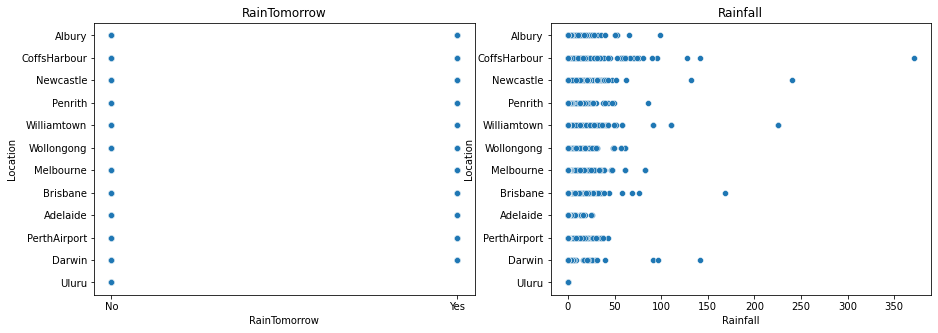

In [35]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

We can see that location does not have any kmajot impact on the prediction of rainfall, however we will not drop the feature as prediction is done as per reigion

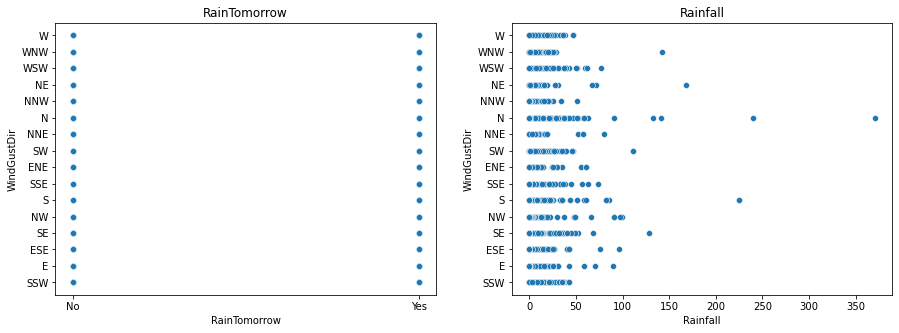

In [36]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

From this graph we can observe that we see no linear relation of the feature with both the targets

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

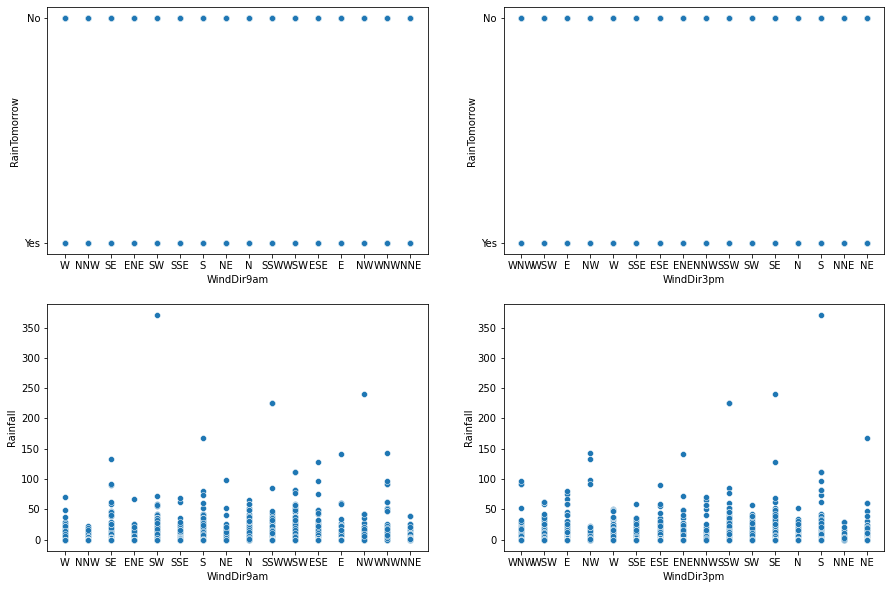

In [37]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We donot see any linear relation either

Checking the relation between Rainfall today and Rainfall Tomorrow

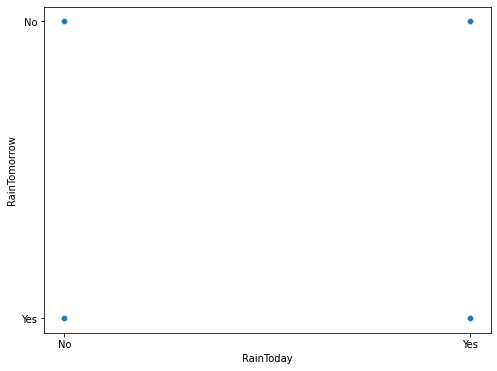

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

There is no relation that we can see.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

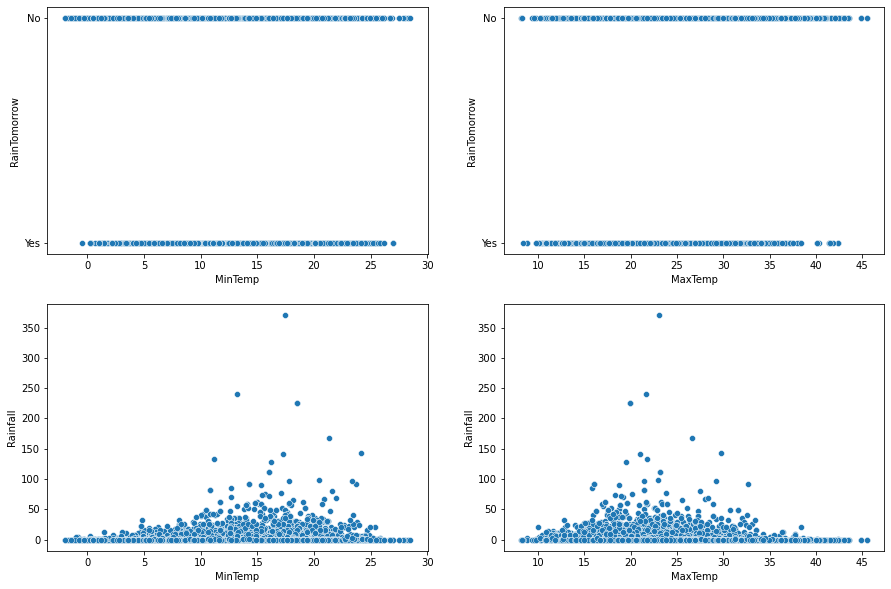

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see from the plotted graphs that there is no linear relation of max temp and min temp with both the targets

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

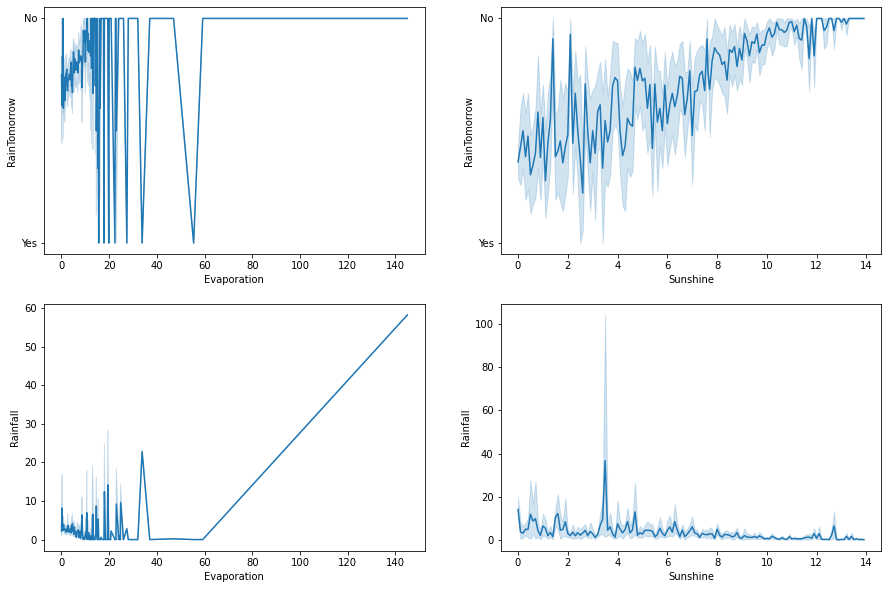

In [40]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see the relation in the graphs

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

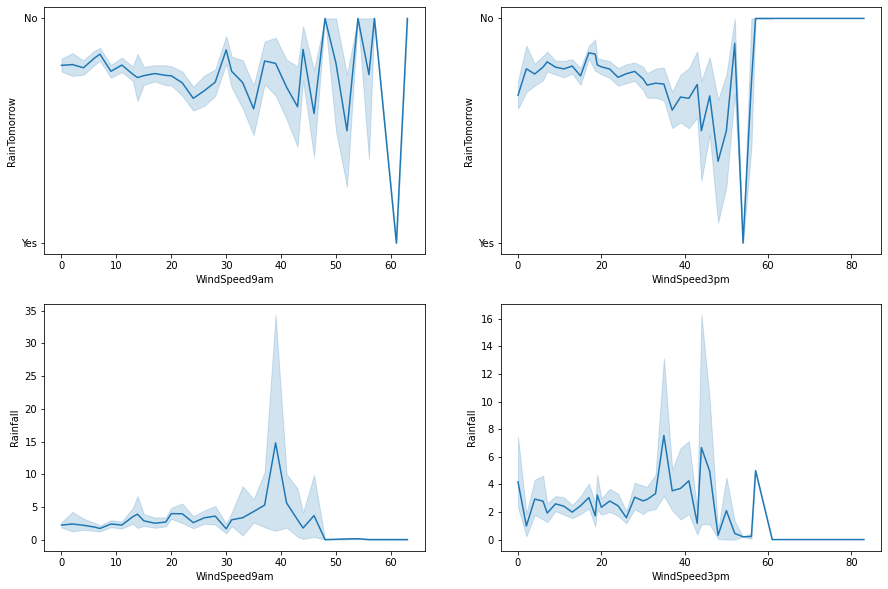

In [41]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relaion seen

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

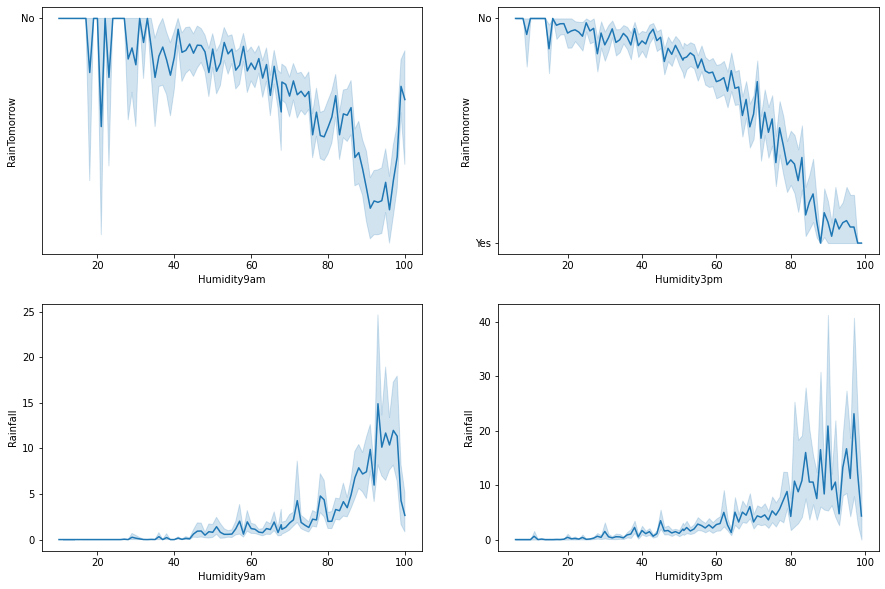

In [42]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Here we can see a inverse relation in humidity with rain tomorrow and positive relation between humidity and Rainfall

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

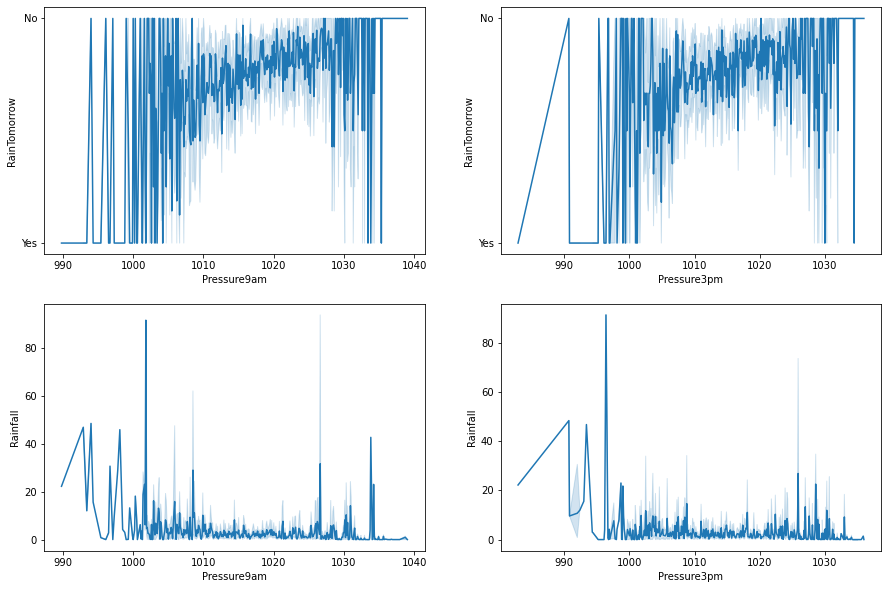

In [43]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

As the graph shows, we dont see an linear relation

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

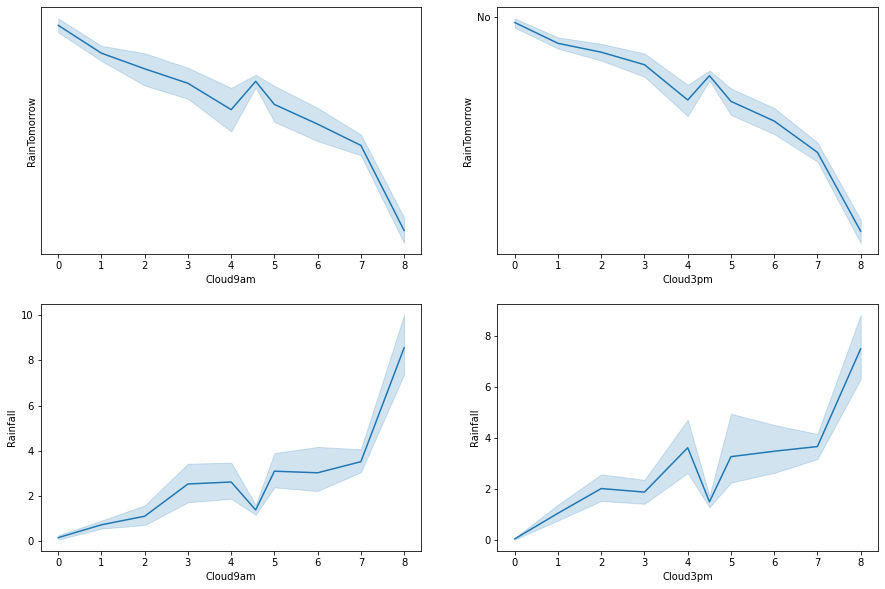

In [44]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

The graph shows a linear relationship, and inverse relation between could and rain tomorrow and a positive relation between could and rainfall.

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

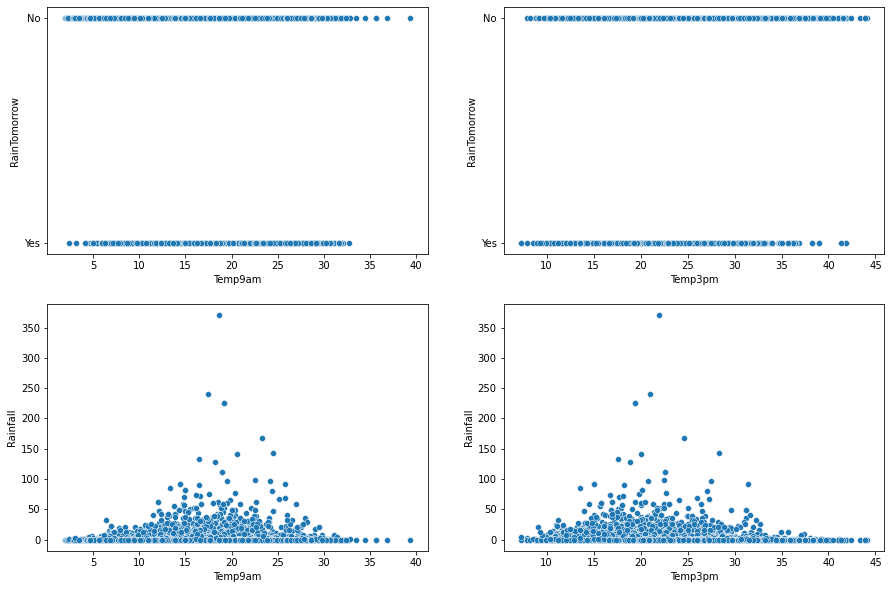

In [45]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relation that is seen in these plots.

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

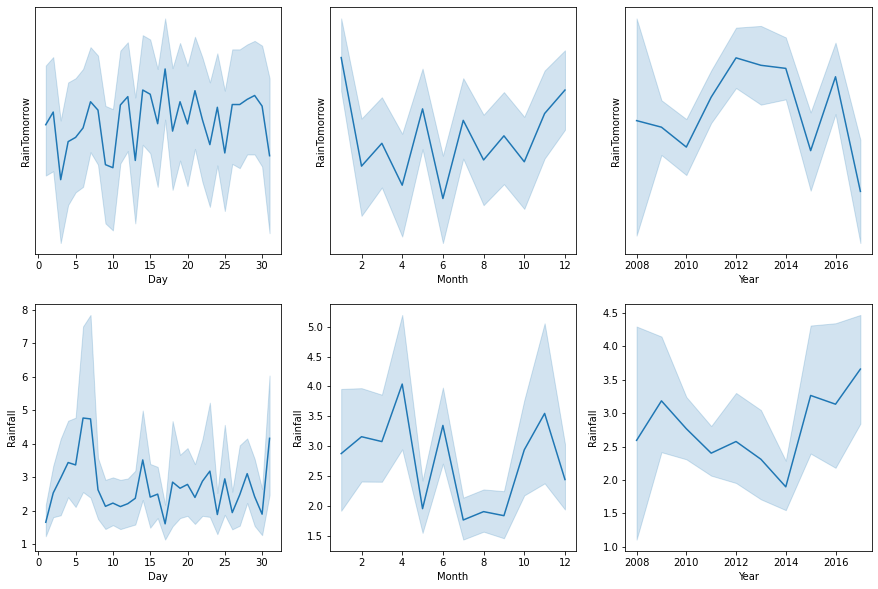

In [46]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=df)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=df)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=df)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=df)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=df)

It can be clearly seen that there is no linear relationship.

Identifying the Outliers

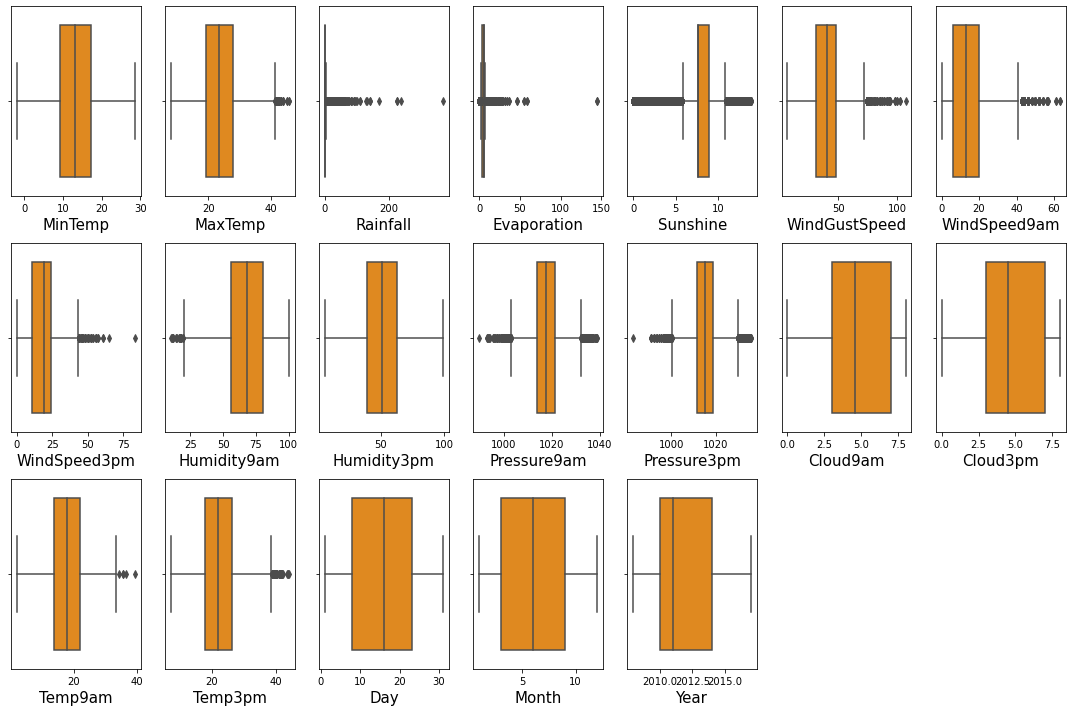

In [47]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above boxplots, we can see that features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm

Lets remove the outliers

# Removing Outliers

In [48]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [49]:
from scipy.stats import zscore

In [50]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


z=np.abs(zscore(feature))

z

array([[1.57008852e-01, 2.06020811e-01, 2.30589346e-16, ...,
        1.30866453e+00, 1.53712470e-01, 1.08138052e-01],
       [2.02812062e-01, 2.64164519e-01, 2.30589346e-16, ...,
        1.19607152e+00, 1.00217155e-01, 3.12348332e-01],
       [3.00945038e-01, 2.64164519e-01, 2.30589346e-16, ...,
        1.05130907e+00, 5.77390162e-01, 1.27334323e-01],
       ...,
       [4.97210991e-01, 2.64164519e-01, 2.30589346e-16, ...,
        2.51552929e-01, 9.38310416e-01, 6.15098528e-01],
       [5.13566487e-01, 2.64164519e-01, 2.30589346e-16, ...,
        2.03298781e-01, 4.74684357e-01, 5.98279073e-01],
       [2.90531973e-15, 2.64164519e-01, 2.30589346e-16, ...,
        4.28484806e-01, 4.92516128e-01, 2.59513150e-01]])

In [51]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

# Checking the skewness of the dataset

In [52]:
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

We can see that features, Sunshine, Rainfall, Evaporation, Windspeed9am, Windgustspeed has skewness.

Removing skewness using log transformation

In [53]:
new_df["Sunshine"] = np.log1p(new_df["Sunshine"])
new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
new_df["Evaporation"] = np.log1p(new_df["Evaporation"])
new_df["WindSpeed9am"] = np.log1p(new_df["WindSpeed9am"])
new_df["WindGustSpeed"] = np.log1p(new_df["WindGustSpeed"])

In [54]:
#checking skewness again
new_df.skew().sort_values()

Sunshine        -2.460672
WindSpeed9am    -1.186810
Evaporation     -0.993594
WindGustSpeed   -0.526267
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
Rainfall         1.811941
dtype: float64

We can here see that we have successfully removed all the outliers

# Encoding the categorical columns

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
le=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


Now we have converted the categorical columns into numerical columns using label encoding method.

# Checking the correlation between feature and label

In [57]:
cor =new_df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013354,0.123801,0.068152,-0.037707,0.263202,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.080984,0.355551,0.008673,-0.154935,0.262663,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.206494,0.458312,0.316812,-0.237955,0.163935,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013354,0.080984,-0.206494,1.000000,-0.151081,-0.189936,0.116389,0.086445,0.148138,0.103933,...,-0.034828,0.278194,0.240747,-0.076736,-0.215864,0.902769,0.317142,-0.016476,-0.005666,0.002860
Evaporation,0.123801,0.355551,0.458312,-0.151081,1.000000,0.349285,-0.116103,0.154434,-0.096182,-0.039583,...,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.068152,0.008673,0.316812,-0.189936,0.349285,1.000000,-0.073069,0.002758,-0.054298,-0.049383,...,-0.035891,-0.438407,-0.460418,0.182254,0.332749,-0.187463,-0.293951,-0.000143,-0.001379,0.115062
WindGustDir,-0.037707,-0.154935,-0.237955,0.116389,-0.116103,-0.073069,1.000000,-0.002519,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.263202,0.262663,0.163935,0.086445,0.154434,0.002758,-0.002519,1.000000,-0.059409,0.086693,...,-0.322502,0.001923,0.053528,0.237165,0.130016,0.075067,0.161878,-0.005867,0.048639,-0.014468
WindDir9am,-0.041030,-0.045231,-0.217160,0.148138,-0.096182,-0.054298,0.405681,-0.059409,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.103933,-0.039583,-0.049383,0.507292,0.086693,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


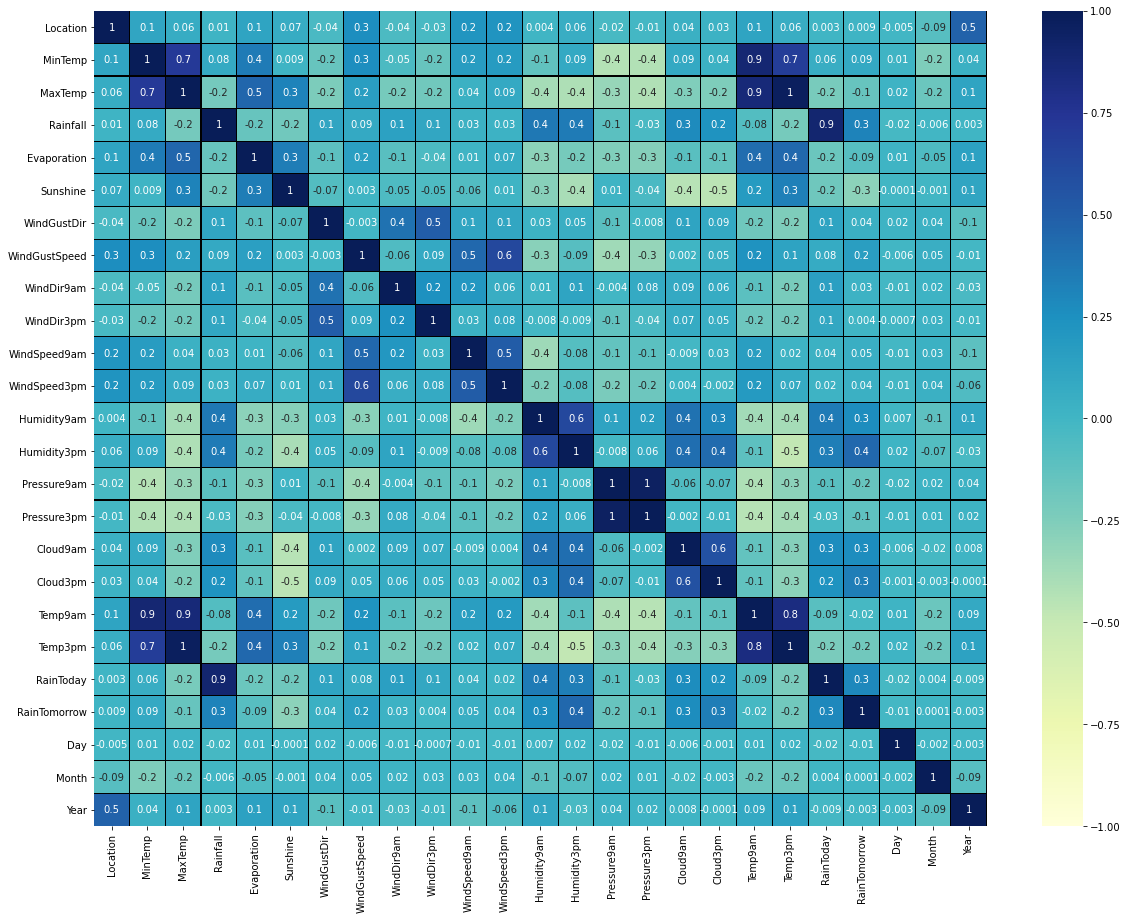

In [58]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [59]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.317142
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.161878
MinTemp          0.091021
WindSpeed9am     0.048750
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.087821
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.293951
Name: RainTomorrow, dtype: float64

Here we can clearly see that humidy has the highest corelation with raintomorrow

In [60]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.086445
MinTemp          0.080984
WindSpeed9am     0.032173
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
Sunshine        -0.189936
MaxTemp         -0.206494
Temp3pm         -0.215864
Name: Rainfall, dtype: float64

Here we can clearly see that Rain today has highest relation with Rainfall

# Visualizing the correlation between label and features using bar plot

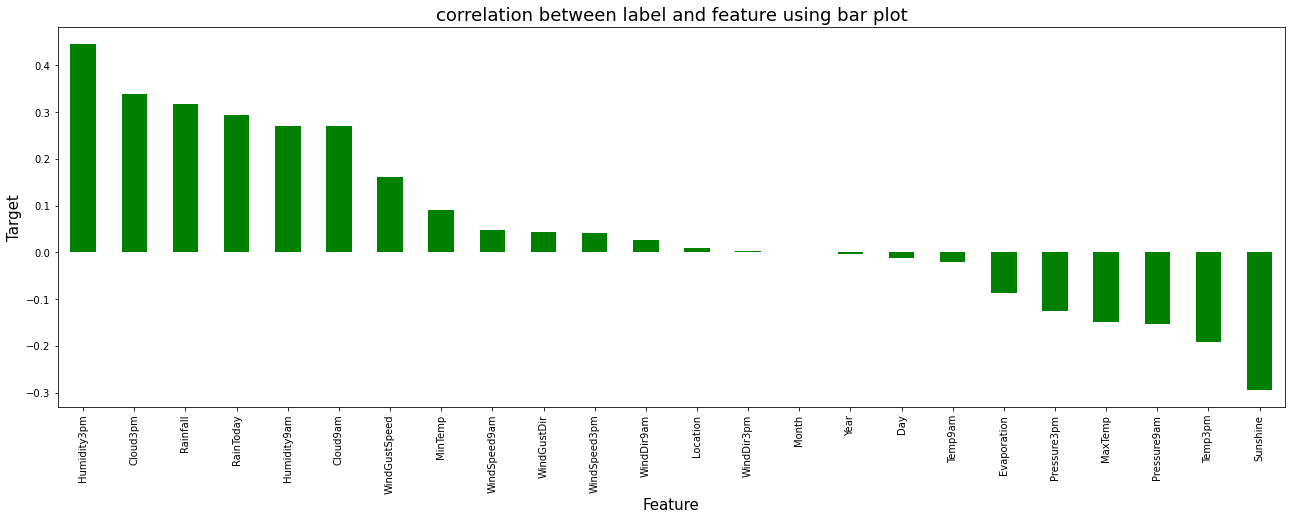

In [61]:
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Prediction for Rain-Tomorrow

Data Pre-processing

Splitting feature and label into x and y

In [62]:
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

Here we have seperated the feature and the label.

# Feature Scaling using Standard Scalarization

In [63]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.001029,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.543392,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.543392,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.543392,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.256468,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.543392,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.543392,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.543392,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.543392,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


The dataset has been now scaled

# Checking VIF (Multicolinearity)

In [64]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns


In [65]:
# Let's check the values
vif

,VIF values,Features
0,1.591950,Location
1,8.763864,MinTemp
2,26.351310,MaxTemp
3,5.619158,Rainfall
4,1.505020,Evaporation
5,1.633523,Sunshine
6,1.621681,WindGustDir
7,2.158495,WindGustSpeed
8,1.397334,WindDir9am
9,1.493832,WindDir3pm


We can see that we have high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [66]:
# Dropping Temp3pm column
x.drop("Temp3pm",axis=1,inplace=True)

In [67]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

In [68]:
# Let's check the values
vif

,VIF values,Features
0,1.590914,Location
1,8.725374,MinTemp
2,9.618350,MaxTemp
3,5.616245,Rainfall
4,1.503205,Evaporation
5,1.632528,Sunshine
6,1.618586,WindGustDir
7,2.151185,WindGustSpeed
8,1.396733,WindDir9am
9,1.492748,WindDir3pm


In [69]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [70]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.590819,Location
1,8.576956,MinTemp
2,9.205668,MaxTemp
3,5.604577,Rainfall
4,1.491358,Evaporation
5,1.632164,Sunshine
6,1.603541,WindGustDir
7,2.132035,WindGustSpeed
8,1.373054,WindDir9am
9,1.426346,WindDir3pm


In [71]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [72]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.589072,Location
1,4.530225,MinTemp
2,5.347522,MaxTemp
3,5.595027,Rainfall
4,1.485802,Evaporation
5,1.627447,Sunshine
6,1.601592,WindGustDir
7,2.090701,WindGustSpeed
8,1.372795,WindDir9am
9,1.426023,WindDir3pm


Now we can see that we have removed all the multi-colinearity and it dont exist in the dataset

# Oversampling

In [73]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

We can see that there is a significant difference in the classes hence lets fix this using SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [75]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

Now we can see that the oversampling issue has been fixed.

Finding the best random state

In [76]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9429575560962422  on Random_state  71


We got the accuracy score at the best random_state.

# Feature Importance

In [77]:
# Lets ckeck the feature importance using Random Forest Regressor

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Humidity3pm,0.152
Cloud3pm,0.082
Rainfall,0.064
Sunshine,0.059
Humidity9am,0.058
Cloud9am,0.058
WindGustSpeed,0.056
Pressure3pm,0.048
MinTemp,0.041


With the help of Random Forest Classifier we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

# Creating train_test split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Modelling

# Logistic Regression Base Line Model

In [79]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7726412543930792
[[1499  381]
 [ 460 1359]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1880
           1       0.78      0.75      0.76      1819

    accuracy                           0.77      3699
   macro avg       0.77      0.77      0.77      3699
weighted avg       0.77      0.77      0.77      3699



With this model we are getting an accuracy score of 77%

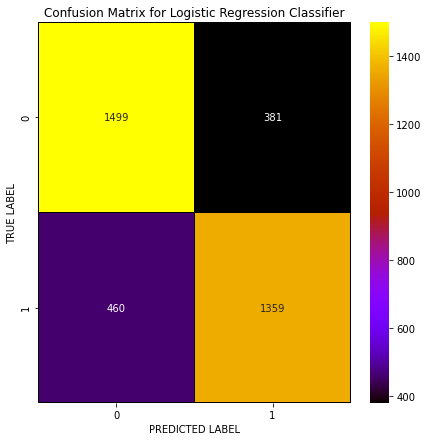

In [80]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Random Forest Classifier

In [81]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9407948094079481
[[1747  133]
 [  86 1733]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1880
           1       0.93      0.95      0.94      1819

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



With this model we are getting an accuracy score of 94%

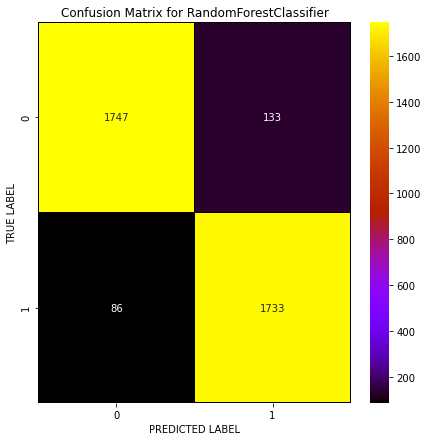

In [82]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# AdaBoost Classifier

In [83]:
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.826169234928359
[[1543  337]
 [ 306 1513]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1880
           1       0.82      0.83      0.82      1819

    accuracy                           0.83      3699
   macro avg       0.83      0.83      0.83      3699
weighted avg       0.83      0.83      0.83      3699



With this model we are getting an accuracy score of 82%

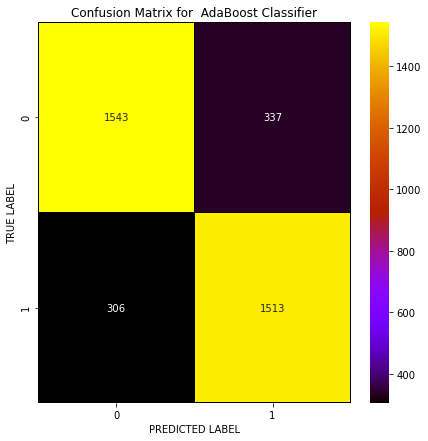

In [84]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# Gradient Boosting Classifier

In [85]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8642876453095432
[[1622  258]
 [ 244 1575]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1880
           1       0.86      0.87      0.86      1819

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699



With this model we are getting an accuracy score of 86%

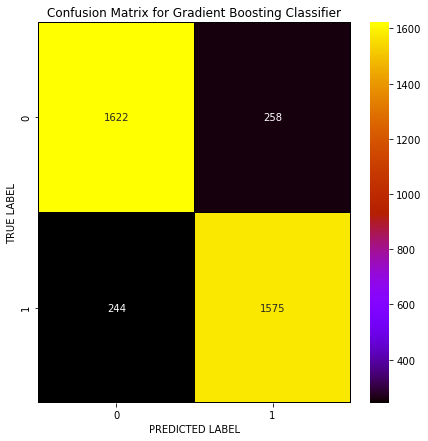

In [86]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# XGB Classifier

In [87]:
# Checking accuracy for XGBClassifier
xgb = xgb(verbosity=0)
xgb.fit(x_train,y_train)

# Prediction
predxgb = xgb.predict(x_test)

print(accuracy_score(y_test, predxgb))
print(confusion_matrix(y_test, predxgb))
print(classification_report(y_test,predxgb))

0.9345769126791025
[[1772  108]
 [ 134 1685]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1880
           1       0.94      0.93      0.93      1819

    accuracy                           0.93      3699
   macro avg       0.93      0.93      0.93      3699
weighted avg       0.93      0.93      0.93      3699



With this model we are getting an accuracy score of 93%

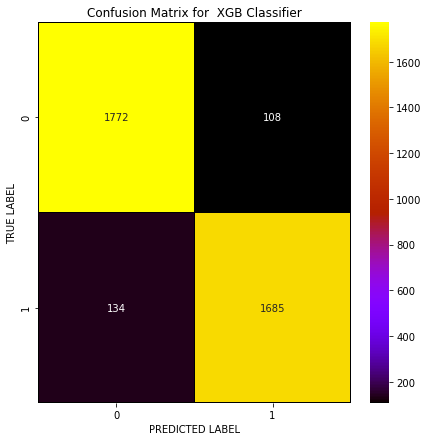

In [88]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predxgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

# Extra Trees Classifier

In [89]:
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.9483644228169775
[[1761  119]
 [  72 1747]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1880
           1       0.94      0.96      0.95      1819

    accuracy                           0.95      3699
   macro avg       0.95      0.95      0.95      3699
weighted avg       0.95      0.95      0.95      3699



With this model we are getting an accuracy score of 94%

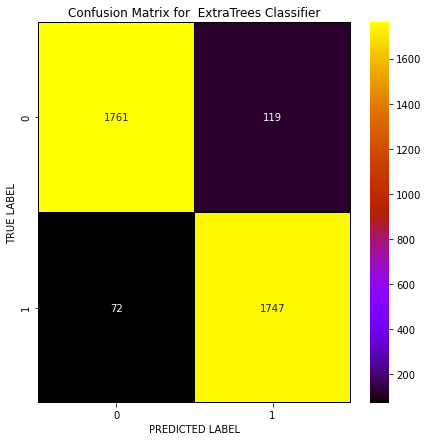

In [90]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predxtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

# Cross Validation Score

In [91]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for XGB Classifier
print('XGB Classifier:',cross_val_score(xgb,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,x,y,cv=5).mean())

Logistic Regression: 0.7086780210867802
Random Forest Classifier: 0.778669910786699
AdaBoosting Classifier: 0.6640713706407138
Gradient Boosting Classifier: 0.6802108678021087
XGB Classifier: 0.710624493106245
Extra Trees Classifier: 0.7962692619626927


We can see from the accuracy score of the models and after cross validation, ExtraTress is the best fit model.

# HyperParameter Tuning of the best fit model

In [92]:
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [93]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [95]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [96]:
Rainfall_Tomorrow=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=50)
Rainfall_Tomorrow.fit(x_train, y_train)
pred = Rainfall_Tomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

94.62016761286834


After Hyperparameter Tuning the score has increased to 94.6%

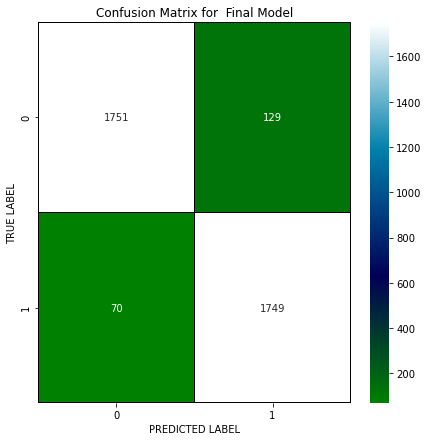

In [97]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show() 

# Plotting ROC and Compare AUC for the best model

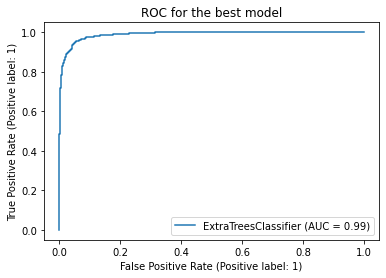

In [98]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Rainfall_Tomorrow, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the Model

In [99]:
import joblib
joblib.dump(Rainfall_Tomorrow,"Prediction_of_Rainfall_Tomorrow.pkl")

['Prediction_of_Rainfall_Tomorrow.pkl']

The model is now saved using joblib library.

# Predicting the saved model

In [100]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall_Tomorrow.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 0, ..., 1, 1, 0])

In [101]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
3694,1,1
3695,0,0
3696,1,1
3697,1,1


We can see that the Actual Value and Predicted Value is almost same.

# Prediction for Rainfall

# Data Preprocessing Again

Splitting the label and feature

In [102]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [103]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

# Feature Scaling using Standard Scalarization

In [104]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,0.742680,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,-0.771299,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,0.691207,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,0.152299,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,-0.275457,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,0.314924,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,0.314924,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,-0.040046,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,0.314924,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# Checking VIF (Multicolinearity)

In [105]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.602216,Location
1,8.776052,MinTemp
2,26.340651,MaxTemp
3,1.505386,Evaporation
4,1.647674,Sunshine
5,1.623987,WindGustDir
6,2.216485,WindGustSpeed
7,1.396968,WindDir9am
8,1.495284,WindDir3pm
9,1.814908,WindSpeed9am


We see multicolinearity exist in MaxTemp, Temp9am, Temp3pm, Pressure9am,Pressure3pm.

In [106]:
# Dropping MaxTemp column
x.drop("MaxTemp",axis=1,inplace=True)

In [107]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.600105,Location
1,8.762938,MinTemp
2,1.502767,Evaporation
3,1.641266,Sunshine
4,1.623369,WindGustDir
5,2.206998,WindGustSpeed
6,1.394553,WindDir9am
7,1.494076,WindDir3pm
8,1.814058,WindSpeed9am
9,1.964154,WindSpeed3pm


In [108]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [109]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.600020,Location
1,8.597799,MinTemp
2,1.489207,Evaporation
3,1.640480,Sunshine
4,1.610549,WindGustDir
5,2.187804,WindGustSpeed
6,1.372896,WindDir9am
7,1.432629,WindDir3pm
8,1.804904,WindSpeed9am
9,1.951201,WindSpeed3pm


In [110]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [111]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.599476,Location
1,4.956734,MinTemp
2,1.484270,Evaporation
3,1.633260,Sunshine
4,1.605885,WindGustDir
5,2.166456,WindGustSpeed
6,1.372360,WindDir9am
7,1.432534,WindDir3pm
8,1.794714,WindSpeed9am
9,1.910324,WindSpeed3pm


Now we can see that there is no vif values more then 10, hence multicolinearity issue has been resolved.

# Finding the best random state

In [112]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8870024724096305  on Random_state  195


We have got the best accuracy score at the best random state

# Feature Importance

In [113]:
# Lets ckeck the feature importance using Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
RainToday,0.808
Humidity9am,0.019
MinTemp,0.019
Pressure3pm,0.014
Humidity3pm,0.013
Temp3pm,0.013
WindGustSpeed,0.012
WindSpeed9am,0.012
Day,0.012


With the help of Random Forest Regressor we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

# Creating train test split

# Random Forest Regressor

In [114]:
# Checking R2 score for Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predrf))
print('MSE:',metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 0.8774208817812398
MAE: 0.15666886803732705
MSE: 0.09589861217679087
RMSE: 0.3096750105784948


We have got an accuracy score of 87% with this model

# Decision Tree Regressor

In [115]:
# Checking R2 score for Decision Tree Regressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

# prediction
preddt=dt.predict(x_test)
print('R2_Score:',r2_score(y_test,preddt))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, preddt))
print('MSE:',metrics.mean_squared_error(y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddt)))

R2_Score: 0.7816651868310546
MAE: 0.1698029172125409
MSE: 0.17081217320729852
RMSE: 0.4132942937028027


We have got an accuracy score of 78% with this model

# GradientBoosting Regressor

In [117]:
# Checking R2 score for GradientBoosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8509045343846732
MAE: 0.18338646528862773
MSE: 0.11664342542296106
RMSE: 0.3415310021403051


We have got an accuracy score of 85% with this model

# BaggingRegressor

In [118]:
br=BaggingRegressor()
br.fit(x_train,y_train)

# prediction
predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predbr))
print('MSE:',metrics.mean_squared_error(y_test, predbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.867956293360016
MAE: 0.15884713824773422
MSE: 0.10330314328787346
RMSE: 0.3214080635078614


We have got an accuracy score of 86% with this model

# ExtraTrees Regressor

In [119]:
# Checking R2 score for Extra Trees Regressor

et=ExtraTreesRegressor()
et.fit(x_train,y_train)

# prediction
predet=et.predict(x_test)
print('R2_Score:',r2_score(y_test,predet))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predet))
print('MSE:',metrics.mean_squared_error(y_test, predet))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predet)))

R2_Score: 0.8830719868731962
MAE: 0.13567801798433582
MSE: 0.09147752363039868
RMSE: 0.3024525146703176


We have got an accuracy score of 88% with this model

# XGB Regressor

In [120]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(x_train,y_train)

# prediction
predxgb=xgb.predict(x_test)
print('R2_Score:',r2_score(y_test,predxgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predxgb))
print('MSE:',metrics.mean_squared_error(y_test, predxgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predxgb)))

R2_Score: 0.8669005954980533
MAE: 0.15932032665105225
MSE: 0.10412905851153785
RMSE: 0.3226903446208731


We have got an accuracy score of 86% with this model

# Cross-Validation

In [121]:
# Checking cv score for Random Forest Regressor
print('Random Forest:',cross_val_score(rf,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(dt,x,y,cv=5).mean())

# Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(gb,x,y,cv=5).mean())

# Checking cv score for Bagging Regressor
print('Bagging Regressor:',cross_val_score(br,x,y,cv=5).mean())

# Checking cv score for ExtraTreesRegressor
print('ExtraTreesRegressor:',cross_val_score(et,x,y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,x,y,cv=5).mean())

Random Forest: 0.8523913294653671
Decision Tree: 0.7086894204913594
Gradient Boosting: 0.8289666542240944
Bagging Regressor: 0.8410154139511811
ExtraTreesRegressor: 0.8615594350408665
XGBRegressor: 0.8327763987018008


Here we have got the cross-validation scores.

Based on the model score and the cross val score we have found that RandomForest Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper parameter tuning

In [123]:
#RandomForest Regressor

parameters = {'n_estimators' : [50,100,200],
              'criterion' :['mse', 'mae'],
              'max_depth' : [4, 6, 8]}
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 200]})

In [124]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 100}

In [125]:
Rainfall = RandomForestRegressor(criterion='mse', max_depth=8, n_estimators=100)
Rainfall.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 86.03744755005845
RMSE value: 0.33050674226388443
MAE: 0.1757565376238563
MSE: 0.10923470668188573


After Hyperparameter Tuning, we have got the accuracy score of 86%

# Saving the model

In [126]:
import joblib
joblib.dump(Rainfall,"Prediction_of_Rainfall.pkl")

['Prediction_of_Rainfall.pkl']

# Predicting the saved model

In [127]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0.02837583, 0.02001435, 2.1853969 , ..., 0.04632208, 0.03665606,
       0.0272122 ])

In [128]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0.028376,0.000000
1,0.020014,0.000000
2,2.185397,2.721295
3,0.031429,0.000000
4,0.027828,0.000000
...,...,...
2392,0.036656,0.000000
2393,0.063323,0.182322
2394,0.046322,0.000000
2395,0.036656,0.470004


# Model Building and Prediction:

Final Score for Rainfall Tomorrow is : 94%

Final Score for Rainfall is: 86%

Thank You